<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"> <span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matrix-multiplication</a></span></li> <li><span><a href="#Transformation-algorithm" data-toc-modified-id="Transformation-algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</ span>Transformation algorithm</a></span></li><li><span><a href="#Checking-algorithm" data-toc-modified-id="Checking-algorithm-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithm check</a></span></li><li><span><a href="#Check-list" data-toc-modified-id="Check-list-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check-list</a></span> </li></ul></div>

# Protection of personal data of clients

The goal of the project is to develop a data transformation method that makes it difficult to recover personal information from customers. This will protect the data of clients of the insurance company "Though the Flood".

The data protection method is chosen in such a way that the quality of machine learning models does not deteriorate during the transformation.

## Loading data

In [39]:
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 знака после запятой
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.random import RandomState
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix

from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv(r'datasets/09_insurance.csv')

In [3]:
df

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0       1    41.00  49600.00            1                  0
1       0    46.00  38000.00            1                  1
2       0    29.00  21000.00            0                  0
3       0    21.00  41700.00            2                  0
4       1    28.00  26100.00            0                  0
5       1    43.00  41000.00            2                  1
6       1    39.00  39700.00            2                  0
7       1    25.00  38600.00            4                  0
8       1    36.00  49700.00            1                  0
9       1    32.00  51700.00            1                  0
10      1    25.00  36600.00            1                  0
11      1    38.00  29300.00            0                  0
12      0    23.00  39500.00            3                  0
13      0    21.00  55000.00            0                  0
14      0    40.00  43700.00            1                  0
15      1    34.00  23300.00            0                  0
16      1    26.00  48900.00            2                  0
17      1    41.00  33200.00            2                  0
18      1    42.00  49700.00            0                  1
19      1    27.00  36900.00            0                  0
20      1    38.00  43500.00            1                  0
21      1    36.00  36100.00            1                  0
22      0    41.00  26600.00            0                  0
23      0    33.00  48700.00            2                  0
24      0    21.00  40400.00            3                  0
25      1    47.00  38400.00            3                  1
26      1    25.00  34600.00            1                  0
27      1    30.00  34800.00            1                  0
28      1    19.00  36800.00            0                  0
29      0    21.00  42200.00            2                  0
30      0    25.00  46300.00            0                  0
31      1    40.00  30300.00            0                  0
32      1    30.00  51000.00            2                  0
33      0    31.00  28100.00            0                  0
34      0    19.00  64800.00            2                  0
35      1    27.00  30400.00            0                  0
36      1    22.00  45300.00            2                  0
37      0    27.00  38300.00            0                  0
38      1    31.00  49500.00            1                  0
39      1    33.00  19400.00            1                  0
40      1    42.00  40200.00            0                  1
41      1    39.00  31700.00            1                  0
42      1    42.00  69200.00            0                  1
43      0    20.00  33100.00            1                  0
44      0    30.00  31600.00            2                  0
45      0    24.00  30400.00            1                  0
46      0    26.00  34500.00            1                  0
47      0    42.00  38700.00            1                  1
48      1    25.00  33100.00            1                  0
49      0    28.00  36600.00            1                  0
50      1    28.00  39600.00            0                  0
51      0    30.00  38600.00            2                  0
52      1    29.00  42400.00            0                  0
53      1    34.00  34600.00            0                  0
54      1    42.00  28100.00            2                  0
55      0    46.00  34900.00            1                  1
56      0    19.00  30500.00            0                  0
57      0    31.00  48900.00            0                  0
58      1    20.00  24200.00            3                  0
59      1    30.00  49900.00            1                  0
60      0    28.00  14300.00            1                  0
61      0    38.00  47000.00            1                  0
62      1    23.00  44800.00            1                  0
63      0    32.00  43800.00            1                  0
64      0    27.00  42700.00            3

In [4]:
# describtion function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique(), df[col].isnull().sum().sum(), df.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df)

Values  \
Возраст            [41.0, 46.0, 29.0, 21.0, 28.0, 43.0, 39.0, 25....   
Зарплата           [49600.0, 38000.0, 21000.0, 41700.0, 26100.0, ...   
Пол                                                           [1, 0]   
Члены семьи                                    [1, 0, 2, 4, 3, 5, 6]   
Страховые выплаты                                 [0, 1, 2, 3, 5, 4]   

                  Data type Unique values Missing Duplicates  
Возраст             float64            46       0        153  
Зарплата            float64           524       0        153  
Пол                   int64             2       0        153  
Члены семьи           int64             7       0        153  
Страховые выплаты     int64             6       0        153

In [5]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')
df = df.drop_duplicates()

In [6]:
# describtion function
def describe_colums(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique(), df[col].isnull().sum().sum(), df.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Значения', 1: 'Тип данных', 2: 'Уникальные значения', 3: 'Пропуски', 4: 'Дубликаты'}, axis=1)
describe_colums(df)

Значения  \
Пол                                                           [1, 0]   
Члены семьи                                    [1, 0, 2, 4, 3, 5, 6]   
Страховые выплаты                                 [0, 1, 2, 3, 5, 4]   
Возраст            [41, 46, 29, 21, 28, 43, 39, 25, 36, 32, 38, 2...   
Зарплата           [49600, 38000, 21000, 41700, 26100, 41000, 397...   

                  Тип данных Уникальные значения Пропуски Дубликаты  
Пол                    int64                   2        0         0  
Члены семьи            int64                   7        0         0  
Страховые выплаты      int64                   6        0         0  
Возраст                int32                  46        0         0  
Зарплата               int32                 524        0         0

There are no gaps or duplicates. Gender and insurance benefits are categorical data. The rest of the data is quantitative

In [7]:
df.describe()

Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
count 4847.00  4847.00   4847.00      4847.00            4847.00
mean     0.50    31.02  39895.81         1.20               0.15
std      0.50     8.49   9972.95         1.10               0.47
min      0.00    18.00   5300.00         0.00               0.00
25%      0.00    24.00  33200.00         0.00               0.00
50%      0.00    30.00  40200.00         1.00               0.00
75%      1.00    37.00  46600.00         2.00               0.00
max      1.00    65.00  79000.00         6.00               5.00

The data are normally distributed, mean and median are close to each other.

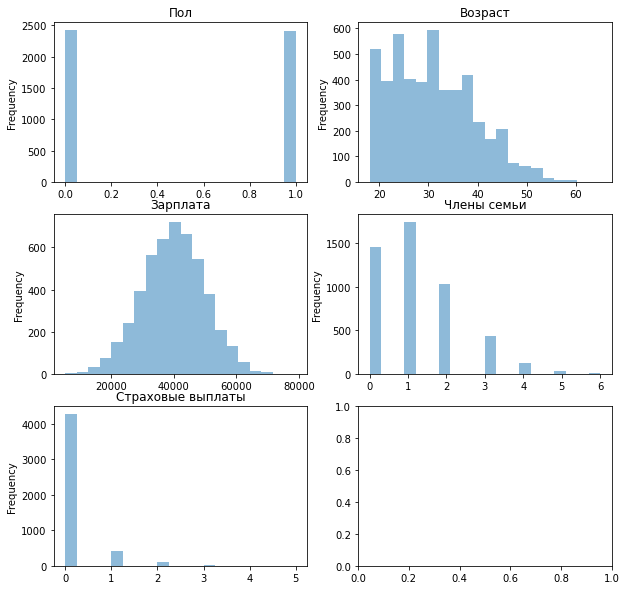

In [8]:
# Set the number of columns in the subplot grid
ncols = 2

# Calculate the number of rows in the subplot grid
nrows = len(df.columns) // ncols + (len(df.columns) % ncols != 0)

# Create a subplot grid
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))

# Flatten the subplot grid into a 1D array
ax = ax.ravel()

# Loop through all the columns in the DataFrame
for i, col in enumerate(df.columns):
    # Plot a histogram of the values in the column
    ax[i].hist(df[col], bins=20, alpha=0.5)
    
    # Add a title and labels to the plot
    ax[i].set_title(col)
    ax[i].set_ylabel("Frequency")

- Distribution by gender is almost even. No imbalance
- Age starts from 20 years old (possible insurance requirement), after 37 years there is a noticeable decline.
- Salary has a normal distribution of values
- The number of family members is most often up to 2 people
- Most often, insurance payments are not made

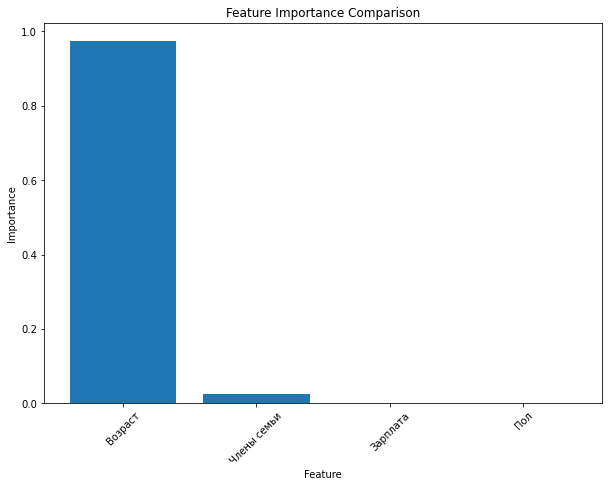

In [12]:
# Separation into features and target variable
features = df[['Пол', 'Возраст', 'Зарплата', 'Члены семьи']]
target = df['Страховые выплаты']

# Create a random forest model
rf = RandomForestRegressor()
rf.fit(features, target)

# Get feature importance
importance = rf.feature_importances_

# Create a DataFrame with feature importance
feature_importance = pd.DataFrame({'Признак': features.columns, 'Важность': importance})
feature_importance = feature_importance.sort_values(by='Важность', ascending=False)

# Visualization of feature importance
plt.figure(figsize=(10, 7))
plt.bar(feature_importance['Признак'], feature_importance['Важность'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)
plt.show()


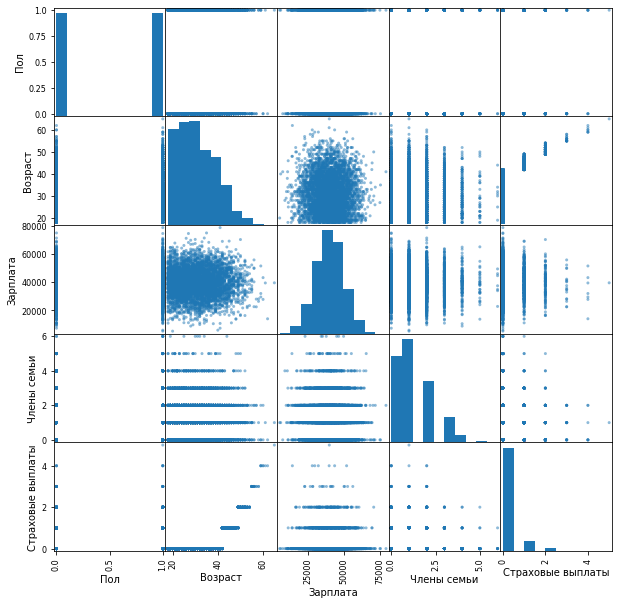

In [14]:
# Выбор интересующих признаков
selected_features = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']

# Создание подмножества данных с выбранными признаками
subset = df[selected_features]

# Построение скатерплотов
scatter_matrix(subset, figsize=(10, 10), alpha=0.5)
plt.show()

The greatest relationship can be traced between age and insurance payments, the number of family members has some influence. The rest of the features are insignificant.

## Matrix-multiplication

This section contains theoretical algebraic formulas in *Jupyter Notebook.*

Designations:

- $X$ - feature matrix (zero column consists of ones)

- $y$ — target feature vector

- $P$ is the matrix by which features are multiplied

- $w$ — vector of linear regression weights (zero element equals shift)

Predictions:

$$
a = Xw
$$

Learning task:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Answer:** The quality of the prediction will not change since the learning formula is used to find the optimal weights 𝑤, which are then used in the prediction formula 𝑎=𝑋𝑤. Training does not affect the prediction itself, only the weights 𝑤 that are used for the prediction.

**Rationale:** Let's represent our feature matrix as the result of multiplying the original feature matrix by an invertible matrix:
$$ X1 = XP $$

Then the learning formula with the values ​​of X1 will look like:

$$ w1 = ((XP)^T XP)^{-1} (XP)^{T} y $$
        
$$ w1 = (P^T (X^T X)P)^{-1} (X P)^T y $$

$$ w1 = (P^T (X^T X) P)^{-1} P^T X^T y $$

$$w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y $$

$$ w1 = P^{-1} (X^T X)^{-1} E X^T y $$

$$ w1 = P^{-1}w $$


Similarly, the prediction formula 𝑎=𝑋𝑤 gives us a linear combination of features and their weights, which allows us to predict the values of the target feature 𝑦. In this formula, each feature 𝑥𝑖 from the feature matrix 𝑋 is multiplied by its corresponding weight 𝑤𝑖 from the weight vector 𝑤. The result of this multiplication is a set of predicted 𝑎 values ​​that can be compared with real 𝑦 values to evaluate the quality of the model.


## Transformation algorithm

**Algorithm**

1. Generate an invertible square matrix with dimensions corresponding to the number of feature columns (4x4), check for reversibility
2. Multiply the matrix of initial features by the generated matrix.
3. Calculate the quality of the model on the resulting matrix
4. Compare the received quantity with the quality of the model on the matrix of initial data.

**Rationale**

In [15]:
#create a random matrix
random_matrix = np.random.normal(size=(4, 4))
random_matrix

array([[ 0.34959213,  1.38017451,  0.13654302,  0.99492647],
       [-1.7632818 ,  0.72986705, -0.45583178,  1.2944402 ],
       [-0.18404403,  0.86989006, -0.66663978,  0.03335757],
       [-0.07976419,  1.56044644,  0.48612595, -1.03292879]])

In [16]:
#let's check for reversibility
determinant = np.linalg.det(random_matrix)

if determinant != 0:
    print("The matrix is ​​invertible")
else:
    print("Matrix is ​​irreversible")

The matrix is ​​invertible


In [18]:
#create a matrix of initial features
target = df['Страховые выплаты']
features = df.drop('Страховые выплаты', axis=1)
matrix_id = features.values
matrix_id

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]], dtype=int64)

In [19]:
matrix_transposed = random_matrix.T

In [20]:
matrix_invert = np.linalg.inv(random_matrix)
matrix_invert 

array([[ 0.39123784, -0.50394061,  0.24476197, -0.24677736],
       [ 0.25710518,  0.01339649,  0.24203079,  0.27225039],
       [ 0.25132369,  0.16341571, -1.26423267,  0.40603838],
       [ 0.47647724,  0.13606121, -0.24824893, -0.34668223]])

In [21]:
#multiply matrices
matrix_0 = matrix_id@matrix_invert
matrix_0

array([[ 12477.06406623,   8105.60039373, -62696.02043657,
         20150.07226464],
       [  9562.60354679,   6210.54912736, -48029.95612409,
         15441.63513032],
       [  5285.25354644,   3432.11832401, -26541.86708399,
          8534.70116096],
       ...,
       [  8525.96815919,   5540.33248522, -42853.14324467,
         13769.45259565],
       [  8225.76165627,   5343.89255162, -41335.58347139,
         13282.15758542],
       [ 10211.80848622,   6634.68488544, -51321.07284674,
         16492.18762401]])

In [22]:
#multiply matrices
matrix_new = matrix_id@matrix_transposed
matrix_new

array([[  6830.46537018, -22579.80047021, -33029.81820745,
         24174.71286494],
       [  5253.11764096, -17286.73923101, -25292.26328253,
         18543.53381008],
       [  2907.42844048,  -9551.30118887, -13974.20853667,
         10253.89795349],
       ...,
       [  4658.40165595, -15435.51104516, -22581.62397472,
         16508.8128677 ],
       [  4498.6549019 , -14887.52201934, -21780.06714687,
         15927.46992437],
       [  5583.63593882, -18486.80274186, -27041.36877176,
         19779.2934869 ]])

In [23]:
#create a dataframe from a new matrix
features_0 = pd.DataFrame (matrix_new, columns = features.columns)
features_0

Пол   Возраст  Зарплата  Члены семьи
0     6830.47 -22579.80 -33029.82     24174.71
1     5253.12 -17286.74 -25292.26     18543.53
2     2907.43  -9551.30 -13974.21     10253.90
3     5724.82 -18990.27 -27780.54     20302.16
4     3602.77 -11878.54 -17375.13     12731.50
5     5659.95 -18656.89 -27294.94     19996.12
6     5476.92 -18067.23 -26431.79     19357.91
7     5309.39 -17573.45 -25710.60     18799.26
8     6837.22 -22629.03 -33100.83     24215.52
9     7104.78 -23543.62 -34437.59     25181.53
10    5033.32 -16665.67 -24377.42     17830.11
11    4053.51 -13329.90 -19499.67     14302.71
12    5428.18 -17984.68 -26312.16     19234.77
13    7538.85 -25055.42 -36646.92     26769.70
14    6023.13 -19889.36 -29097.33     21305.09
15    3228.73 -10597.83 -15503.31     11379.71
16    6715.18 -22270.37 -32576.19     23809.99
17    4592.15 -15102.86 -22096.89     16201.21
18    6844.50 -22625.95 -33095.65     24225.92
19    5076.05 -16802.25 -24575.70     17980.10
20    5993.41 -19801.42 -28965.93     21204.66
21    4980.23 -16429.72 -24034.53     17604.21
22    3688.63 -12095.20 -17696.95     12994.93
23    6697.18 -22172.33 -32436.58     23723.76
24    5548.31 -18396.39 -26913.88     19669.16
25    5311.45 -17467.52 -25558.17     18737.40
26    4760.24 -15754.00 -23044.14     16857.86
27    4794.45 -15841.52 -23173.12     16962.88
28    5051.36 -16762.51 -24516.00     17919.00
29    5793.09 -19218.18 -28113.86     20545.22
30    6356.45 -21086.76 -30843.67     22546.64
31    4192.81 -13784.27 -20164.57     14791.95
32    7007.44 -23224.70 -33972.65     24837.09
33    3879.64 -12786.25 -18705.61     13708.51
34    8876.20 -29521.44 -43181.66     31528.54
35    4188.52 -13839.34 -20242.55     14820.28
36    6218.10 -20632.30 -30179.76     22053.69
37    5266.86 -17438.65 -25508.82     18660.76
38    6803.01 -22541.52 -32971.85     24110.50
39    2695.82  -8819.52 -12904.26      9481.23
40    5547.35 -18295.55 -26762.57     19607.72
41    4383.58 -14421.87 -21098.71     15469.94
42    9507.09 -31514.67 -46095.12     33705.37
43    4548.17 -15072.14 -22048.35     16120.95
44    4358.15 -14379.80 -21039.65     15406.33
45    4185.03 -13838.47 -20244.94     14814.65
46    4747.61 -15705.93 -22976.42     16810.88
47    5343.18 -17608.74 -25762.39     18877.58
48    4555.42 -15070.25 -22044.18     16128.67
49    5037.11 -16661.71 -24374.63     17834.87
50    5446.10 -18032.27 -26374.76     19294.20
51    5313.96 -17570.62 -25706.13     18809.21
52    5829.80 -19307.86 -28240.48     20656.91
53    4771.66 -15748.73 -23036.34     16872.93
54    3897.17 -12777.39 -18696.16     13723.53
55    4829.83 -15873.66 -23225.68     17036.54
56    4190.79 -13889.00 -20315.99     14856.49
57    6719.74 -22267.55 -32571.72     23819.93
58    3335.28 -11014.41 -16115.37     11792.28
59    6856.25 -22724.58 -33239.38     24303.39
60    1992.20  -6496.66  -9508.56      6994.26
61    6470.96 -21395.06 -31298.98     22906.18
62    6150.22 -20404.95 -29845.61     21813.22
63    6025.74 -19940.78 -29170.95     21341.22
64    5870.64 -19440.43 -28441.93     20796.61
65    4860.81 -16122.48 -23583.51     17234.80
66    7873.94 -26038.78 -38094.44     27869.29
67    4095.08 -13464.79 -19700.47     14444.92
68    5136.65 -17032.69 -24915.05     18210.17
69    6622.89 -21897.51 -32031.60     23442.40
70    4660.81 -15331.35 -22429.38     16446.87
71    8494.56 -28139.91 -41163.51     30103.97
72    5436.00 -17929.28 -26230.78     19214.75
73    2176.58  -7086.79 -10371.86      7631.35
74    6453.98 -21404.46 -31311.28     22882.19
75    6825.13 -22528.64 -32956.91     24138.14
76    7233.23 -23949.75 -35033.07     25627.96
77    5191.56 -17109.25 -25030.98     18338.61
78    4824.70 -15877.14 -23228.32     17032.89
79    7211.87 -23907.88 -34973.45     25563.69
80    4521.89 -14877.54 -21763.64     15960.22
81    7086.99 -23500.22 -34373.54     25128.24
82    5151.48 -17022.89 -24905.29     18227.42
83    8368.88 -27732.32 -40566.29     29660.66
84    5744.38 -

In [24]:
#create a dataframe from a new matrix
features_new = pd.DataFrame (matrix_new, columns = features.columns)
features_new

Пол   Возраст  Зарплата  Члены семьи
0     6830.47 -22579.80 -33029.82     24174.71
1     5253.12 -17286.74 -25292.26     18543.53
2     2907.43  -9551.30 -13974.21     10253.90
3     5724.82 -18990.27 -27780.54     20302.16
4     3602.77 -11878.54 -17375.13     12731.50
5     5659.95 -18656.89 -27294.94     19996.12
6     5476.92 -18067.23 -26431.79     19357.91
7     5309.39 -17573.45 -25710.60     18799.26
8     6837.22 -22629.03 -33100.83     24215.52
9     7104.78 -23543.62 -34437.59     25181.53
10    5033.32 -16665.67 -24377.42     17830.11
11    4053.51 -13329.90 -19499.67     14302.71
12    5428.18 -17984.68 -26312.16     19234.77
13    7538.85 -25055.42 -36646.92     26769.70
14    6023.13 -19889.36 -29097.33     21305.09
15    3228.73 -10597.83 -15503.31     11379.71
16    6715.18 -22270.37 -32576.19     23809.99
17    4592.15 -15102.86 -22096.89     16201.21
18    6844.50 -22625.95 -33095.65     24225.92
19    5076.05 -16802.25 -24575.70     17980.10
20    5993.41 -19801.42 -28965.93     21204.66
21    4980.23 -16429.72 -24034.53     17604.21
22    3688.63 -12095.20 -17696.95     12994.93
23    6697.18 -22172.33 -32436.58     23723.76
24    5548.31 -18396.39 -26913.88     19669.16
25    5311.45 -17467.52 -25558.17     18737.40
26    4760.24 -15754.00 -23044.14     16857.86
27    4794.45 -15841.52 -23173.12     16962.88
28    5051.36 -16762.51 -24516.00     17919.00
29    5793.09 -19218.18 -28113.86     20545.22
30    6356.45 -21086.76 -30843.67     22546.64
31    4192.81 -13784.27 -20164.57     14791.95
32    7007.44 -23224.70 -33972.65     24837.09
33    3879.64 -12786.25 -18705.61     13708.51
34    8876.20 -29521.44 -43181.66     31528.54
35    4188.52 -13839.34 -20242.55     14820.28
36    6218.10 -20632.30 -30179.76     22053.69
37    5266.86 -17438.65 -25508.82     18660.76
38    6803.01 -22541.52 -32971.85     24110.50
39    2695.82  -8819.52 -12904.26      9481.23
40    5547.35 -18295.55 -26762.57     19607.72
41    4383.58 -14421.87 -21098.71     15469.94
42    9507.09 -31514.67 -46095.12     33705.37
43    4548.17 -15072.14 -22048.35     16120.95
44    4358.15 -14379.80 -21039.65     15406.33
45    4185.03 -13838.47 -20244.94     14814.65
46    4747.61 -15705.93 -22976.42     16810.88
47    5343.18 -17608.74 -25762.39     18877.58
48    4555.42 -15070.25 -22044.18     16128.67
49    5037.11 -16661.71 -24374.63     17834.87
50    5446.10 -18032.27 -26374.76     19294.20
51    5313.96 -17570.62 -25706.13     18809.21
52    5829.80 -19307.86 -28240.48     20656.91
53    4771.66 -15748.73 -23036.34     16872.93
54    3897.17 -12777.39 -18696.16     13723.53
55    4829.83 -15873.66 -23225.68     17036.54
56    4190.79 -13889.00 -20315.99     14856.49
57    6719.74 -22267.55 -32571.72     23819.93
58    3335.28 -11014.41 -16115.37     11792.28
59    6856.25 -22724.58 -33239.38     24303.39
60    1992.20  -6496.66  -9508.56      6994.26
61    6470.96 -21395.06 -31298.98     22906.18
62    6150.22 -20404.95 -29845.61     21813.22
63    6025.74 -19940.78 -29170.95     21341.22
64    5870.64 -19440.43 -28441.93     20796.61
65    4860.81 -16122.48 -23583.51     17234.80
66    7873.94 -26038.78 -38094.44     27869.29
67    4095.08 -13464.79 -19700.47     14444.92
68    5136.65 -17032.69 -24915.05     18210.17
69    6622.89 -21897.51 -32031.60     23442.40
70    4660.81 -15331.35 -22429.38     16446.87
71    8494.56 -28139.91 -41163.51     30103.97
72    5436.00 -17929.28 -26230.78     19214.75
73    2176.58  -7086.79 -10371.86      7631.35
74    6453.98 -21404.46 -31311.28     22882.19
75    6825.13 -22528.64 -32956.91     24138.14
76    7233.23 -23949.75 -35033.07     25627.96
77    5191.56 -17109.25 -25030.98     18338.61
78    4824.70 -15877.14 -23228.32     17032.89
79    7211.87 -23907.88 -34973.45     25563.69
80    4521.89 -14877.54 -21763.64     15960.22
81    7086.99 -23500.22 -34373.54     25128.24
82    5151.48 -17022.89 -24905.29     18227.42
83    8368.88 -27732.32 -40566.29     29660.66
84    5744.38 -

In [25]:
#create a linear regression class
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T@X)@X.T@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0


## Algorithm check

In [26]:
#check on our features of the multiplied matrix
model = LinearRegression()
model.fit(features_new, target)
predictions = model.predict(features_new)
print(r2_score(target, predictions))

0.43020100466333266


In [27]:
#train the model using the initial data
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4302010046633359


### Thus, we confirmed the theoretical knowledge that the quality of the model will not change.